In [217]:
import numpy as np, matplotlib.pyplot as plt, time 

In [222]:
rho = 4
L = 10
N = int(rho*L**2)
rad = 0.5
v_0 = 0.05
eta = 1
n_grids = int((L/rad)**2)
t = 1000
dt = 1

In [209]:
def grid_no(x,y,L,rad):
    #Given the coordinates of the particle we can find the grid where the particle is
    if y//1.0 == y or x//1.0 == x:
        return(int(y-1)*int(L/rad)+int(x-1))
    else: 
        return(int(y)*int(L/rad)+int(x))
grid = np.vectorize(grid_no)

In [212]:
def nbr_grid(grid_id,L,rad):
    fake_x = grid_id%(L/rad) + 0.5
    fake_y = grid_id//(L/rad) + 0.5
    nbr_g = []
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            nbr_g.append((grid_no(np.mod(fake_x+i,L),np.mod(fake_y+j,L),L,rad)))
    return nbr_g

nbr_grids = [nbr_grid(i,L,rad) for i in range(n_grids)]#for each grids it returns the list of grids which are its neighbours including itself. 

In [138]:
def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [139]:
def is_neighbour(x1,y1,x2,y2):
    return dist(x1,y1,x2,y2) < rad #and dist(x1,y1,x2,y2) != 0

In [140]:
def add_to_dict(dic,key,val):
    if key in dic:
        dic[key] += [val]
    else: 
        dic[key] = [val]

In [141]:
def nbr_avg(p1, nbr_part):
    #if p1 in nbr_part:
    return np.mean(nbr_part[p1])
    #else: 
        #return theta_p1

## Above the necessary functions have been defined. Now we simulate each time step. 

In [223]:
x = np.zeros((t,N))#Creates a list of x positions with rows as time and columns as each particle
x[0,:] = np.random.uniform(0,L,N)#Intialize the 0th time step 

y = np.zeros((t,N))#similarly for y
y[0,:] = np.random.uniform(0,L,N)

theta = np.zeros((t,N))#similarly for theta 
theta[0,:] = np.arctan(y[0,:]/x[0,:])

90.83281373977661


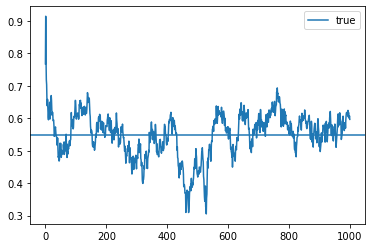

In [224]:
start_time = time.time()
v_as_true = [np.mean(theta[0,:])]
#v_as = [np.mean(theta[0,:])]
for i in range(t-1):#for each time step
    grids = grid(x[i,:],y[i,:],L,rad)
    dic_grids = {}#keys are grids and particles are values --> for each grid how many particles it contains. 
    for ind,el in enumerate(grids):
        add_to_dict(dic_grids, el, ind)
    nbr_part = {}#keys are particles and values are its neighbours and their angles. 
    for grid_id in dic_grids:#for a certain grid 
        for p1 in dic_grids[grid_id]:#a particle in that grid
            for grd in nbr_grids[grid_id]:#a neighbour of our above grid
                if grd in dic_grids:
                    for p2 in dic_grids[grd]:#a particle in the neighbour grid
                        if is_neighbour(x[i,p1],y[i,p1],x[i,p2],y[i,p2]):#if it is the neighbour of our particle
                            add_to_dict(nbr_part,p1,theta[i,p2])#then add the particle and its theta to the list of values for our above particle
    for p in range(N):#for each particle 
        theta[i+1,p] = nbr_avg(p, nbr_part) + np.random.uniform(-eta,eta)
        x[i+1,p] = x[i,p] + v_0*dt*np.cos(theta[i+1,p])
        x[i+1,p] = np.mod(x[i+1,p],L)
        y[i+1,p] = y[i,p] + v_0*dt*np.sin(theta[i+1,p])
        y[i+1,p] = np.mod(y[i+1,p],L) 
    v_a = np.sqrt(np.mean(np.cos(theta[i,:]))**2 + np.mean(np.sin(theta[i,:]))**2)
    v_as_true.append(v_a)
    #v_a = np.mean(theta[i,:])
    #v_as.append(v_a)
#plt.plot(range(t),v_as)
#plt.title(r'$\nu_a $ vs time')
plt.plot(range(t),v_as_true)
plt.axhline(np.mean(v_as_true[95:]))
plt.legend(['true'])
print(time.time() - start_time)